# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luk Letif"
COLLABORATORS = ""

---

In [2]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Understanding generalization error
## (100 points total)

## Question 1: (20 pts) Ground truth classification function

Your task is to implement a function named `f` that classifies data points based on a combined sine and cosine boundary in a 2D space. Here's the detailed specification:

- The function should accept a single pair of numbers or a 2D numpy array of shape `(n_samples, 2)` where each row represents a data point in the form `[x1, x2]`.
- The classification is determined by the function:
$$ f(x_1, x_2) = 
\begin{cases} 
1 & \sin(5 \pi x_1 x_2) + \cos(10\pi x_2 + 5x_1) > 0 \\
0 & \text{otherwise}
\end{cases}
$$ 
- The function should return an array of labels (either 0 or 1) corresponding to the input data points.
- The function is only defined between 0 and 1 for $x_1$ and $x_2$ (both continuous). If the user enters an input outside the range, throw an exception `Exception("Input from 0 to 1 only")`.

## Hints:
- Use numpy for the majority of the solution. Use the constant `np.pi` for maximum accuracy.

In [3]:
def f(x):
    """
    True function for classification
    x: a single pair of numbers or a 2D numpy array of shape (n_samples, 2)
    Returns an array of labels (0 or 1).
    """
    # YOUR CODE HERE
    x = np.asarray(x)

    if x.ndim == 1:
        #x: a single pair of numbers or a 2D numpy array of shape (n_samples, 2)
        #if x is a single pair of numbers, convert it to a 2D numpy array
        x = x.reshape(1, -1)

    # Returns an array of labels (0 or 1) based on determined function f
    labels = []
    for _ in x:
        result = np.sin(5 * np.pi * _[0] * _[1]) + np.cos(10 * np.pi * _[1] + 5 * _[0])
        if result > 0:
            labels.append(1)
        else:
            labels.append(0)
    labels = np.array(labels)

    # raise NotImplementedError()
    if np.any(x < 0) or np.any(x > 1):
        raise Exception("Input from 0 to 1 only")
    return labels

In [4]:
# test your function here
f([0,0])
# f([[0.2, 0.5], [0.5, 0.7], [0.8, 0.9]])

array([1])

In [5]:
""" (20 points) Check whether the function handles single vs. multiple points"""
assert f([0.2, 0.5]) == 1 # can work with one point
assert np.array_equal(f([[0.2, 0.5], [0.5, 0.7], [0.8, 0.9]]), np.array([1, 1, 0])) # can work with an array

# should produce an exception
try:
    f([1.1, 0.5])  # An input with a value outside the range
    assert False, "The function did not raise an exception for values outside [0, 1]"
except Exception as e:
    assert str(e) == "Input from 0 to 1 only", f"Unexpected exception message: {e}"

## Question 2: (10 points) Plotting Decision Boundaries

In many machine learning applications, especially classification tasks, it's crucial to visualize how the classifier divides the input space. Such visualizations help in understanding the nature of the classifier, its complexity, and potential areas of misclassification.

Your task is to implement the function `plot_boundary` that visualizes the decision boundary of a given classifier function in the 2D space.

**Function Specification:**

- The function `plot_boundary` receives a single argument `func`, which is the classifier function.
- The classifier function `func` takes as input a single point or an array of points in the form `[x1, x2]` and returns a label (0 or 1).
- The `plot_boundary` function should plot the decision boundary created by the classifier function over the domain $[0,1] \times [0,1]$.
- Your visualization should clearly show regions classified as `0` or `1` using different colors. Including a color bar can provide additional clarity.
- Ensure that the axes are appropriately labeled as 'x1' and 'x2'.

**Hints:**
1. Use `numpy` to generate a grid of points in the 2D space.
2. For each point in the grid, determine its label using the given classifier function.
3. Use `matplotlib` to visualize the decision boundary. The `contourf` function can be particularly useful.

**Examples:**

Given a simple classifier function that classifies points based on whether \(x1 > 0.5\), your `plot_boundary` function should visualize a vertical decision boundary at \(x1 = 0.5\).

```python
plot_boundary(lambda x: x[:, 0] > 0.5)
plt.title('x1 divider');
```

![](./fig1.png)

```python
plot_boundary(lambda x: np.sin(x[:, 0]*x[:, 1]*20) > 0)
plt.title('weird function');
```

![](./fig2.png)

In [6]:
def plot_boundary(func):
    """
    Plots the decision boundary created by the function.
    
    func: The function that determines the label based on the input coordinates.
    """
    # Use `numpy` to generate a grid of points in the 2D space.
    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)
    X1, X2 = np.meshgrid(x1, x2)

    # For each point in the grid, determine its label using the given classifier function.
    coordinates = np.column_stack((X1.reshape(-1), X2.reshape(-1)))

    ## Classify each point using the determined function
    label = func(coordinates)
    label = np.array(label).reshape(X1.shape)  # Convert list to numpy array and then reshape

    # Use `matplotlib` to visualize the decision boundary. The `contourf` function can be particularly useful.
    plt.contourf(X1, X2, label, levels=[0.0, 0.5, 1.0], cmap='RdBu', alpha=0.5)
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

In [7]:
# YOUR CODE HERE
f = lambda x: np.sin(x[:, 0]*x[:, 1]*20) > 0
# f = lambda x: x[:, 0] > 0.5
# raise NotImplementedError()

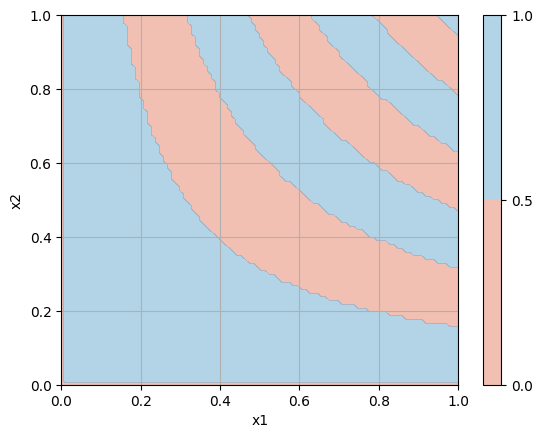

In [8]:
# plot your function here
plot_boundary(f)

## Question 3: (30 points) Majority Vote Classifier

In many machine learning tasks, especially when data is scarce or noisy, it's helpful to rely on simple, interpretable models. One such approach is the majority vote classifier that partitions the input space into small regions and assigns a label based on the majority vote of training examples in that region.

Your task is to implement the `majority_vote_classifier` function that creates such a classifier.

**Function Specification:**

- The function `majority_vote_classifier` takes in two arguments:
  - `x`: The training data, a 2D numpy array of shape `(n_samples, 2)`. Each row represents a data point in the form `[x1, x2]`.
  - `y`: The labels for the training data, a 1D numpy array of shape `(n_samples,)`. Each label is either `0` or `1`.

- The input space is divided into a grid of squares, each of size $0.1 \times 0.1$, ranging from 0 to 1 for both $x_1$ and $x_2$.

- For each square in the grid, determine the label (0 or 1) that appears most frequently in the training data for points that fall into that square. In case of a tie or no data, the square should default to a label of `1`.

- The function should return a new function (a classifier) that, given a new data point or an array of data points, returns the predicted label(s) based on the majority vote in the corresponding grid square(s).

**Hints:**

1. Start by initializing a grid to store the majority vote for each square. You can use a numpy array of shape `(10, 10)` for this purpose.
2. For each square in the grid, determine its boundaries, and identify the training points that fall within these boundaries.
3. Compute the majority label for the points within each square and store it in the grid.
4. The returned classifier function should be able to handle both single data points and arrays of data points.

**Examples:**

1. Suppose the training data consists of three points: `[[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]` with labels `[0, 1, 0]`. If a new data point `[0.12, 0.14]` is passed to the classifier, it should return the label `1` based on the majority vote of the training data in the corresponding grid square.

In [9]:
def majority_vote_classifier(x, y):
    """
    Generator function that creates a majority-vote classifier.
    
    x: Training data (2D numpy array of shape (n_samples, 2))
    y: Labels (1D numpy array of shape (n_samples,))
    
    Returns a function that classifies new data points based on the majority vote.
    """
    # Create an empty matrix to store majority votes
    # TODO: use one grid instead of two, this one does not work for the test some how
    # majority_grid = np.ones((10, 10), dtype=int)  # Default to 1 (break ties with 1)
    # create two grid to store 0s and 1s seperately
    zeros_grid = np.zeros((10, 10), dtype=int)
    ones_grid = np.zeros((10, 10), dtype=int)
    # YOUR CODE HERE
    # for each point, calculate the 0s, and 1s to store seperately 
    for point, label in zip(x, y):
        i, j = int(point[0] * 10), int(point[1] * 10)
        
        # TODO: edge case
        i, j = min(i, 9), min(j, 9)

        if label == 0:
            zeros_grid[i, j] += 1
        else:
            ones_grid[i, j] += 1
    # create the majority grid
    majority_grid = np.where(zeros_grid > ones_grid, 0, 1)
    
    # The function should return a new function (a classifier) that, 
    # given a new data point or an array of data points, 
    # returns the predicted label(s) based on the majority vote in the corresponding grid square(s).

    def classifier(input_data):
        if np.array(input_data).ndim == 1:
            i, j = int(input_data[0] * 10), int(input_data[1] * 10)
            # TODO: edge case
            i, j = min(i, 9), min(j, 9)
            return majority_grid[i, j]
        else:
            labels = []
            for point in input_data:
                i, j = int(point[0] * 10), int(point[1] * 10)
                # TODO: edge case
                i, j = min(i, 9), min(j, 9)
                labels.append(majority_grid[i, j])
            return labels
        
    return classifier


In [10]:
h = majority_vote_classifier(np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]), 
                             np.array([0, 1, 0])
)
h([0.05, 0.05])

0

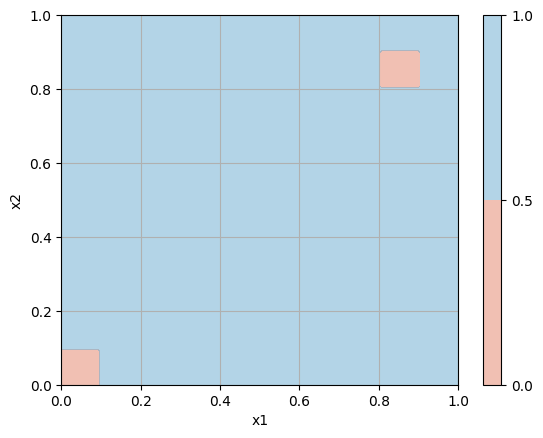

In [11]:
# should be able to use the plot_boundary function
plot_boundary(h)

In [12]:
"""(30 points) Test to check if your classifier is learning from data"""
def test_majority_vote_classifier():
    # Sample training data
    x_train = np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85], [0.12, 0.14], [0.88, 0.88]])
    y_train = np.array([0, 1, 0, 1, 1])

    # Generate the classifier function
    classifier_fn = majority_vote_classifier(x_train, y_train)

    # Check that the function returns a callable object
    assert callable(classifier_fn), "The returned object is not callable."

    # Check the output of the generated classifier for specific inputs
    assert classifier_fn([0.12, 0.14]) == 1, "Unexpected classification for the point [0.12, 0.14]."
    assert classifier_fn([0.88, 0.88]) == 1, "Unexpected classification for the point [0.88, 0.88]."
    assert classifier_fn([0.05, 0.05]) == 0, "Unexpected classification for the point [0.05, 0.05]."

    # Check for an array of inputs
    input_array = [[0.05, 0.05], [0.88, 0.88], [0.12, 0.14]]
    expected_labels = [0, 1, 1]
    assert np.array_equal(classifier_fn(input_array), expected_labels), \
        "Unexpected classifications for the input array."

def test_another_majority_vote_classifier():
    # New sample training data
    x_train_new = np.array([[0.2, 0.2], [0.2, 0.8], [0.8, 0.2], [0.8, 0.8], [0.5, 0.5]])
    y_train_new = np.array([0, 1, 1, 0, 1])

    # Generate the classifier function
    classifier_fn_new = majority_vote_classifier(x_train_new, y_train_new)

    # Check that the function returns a callable object
    assert callable(classifier_fn_new), "The returned object is not callable."

    # Check the output of the generated classifier for specific inputs
    assert classifier_fn_new([0.2, 0.2]) == 0, "Unexpected classification for the point [0.2, 0.2]."
    assert classifier_fn_new([0.2, 0.8]) == 1, "Unexpected classification for the point [0.2, 0.8]."
    assert classifier_fn_new([0.8, 0.8]) == 0, "Unexpected classification for the point [0.8, 0.8]."

    # Check for an array of inputs
    input_array_new = [[0.2, 0.2], [0.8, 0.8], [0.5, 0.5]]
    expected_labels_new = [0, 0, 1]
    assert np.array_equal(classifier_fn_new(input_array_new), expected_labels_new), \
        "Unexpected classifications for the new input array."

test_majority_vote_classifier()
test_another_majority_vote_classifier()

## Question 4 (20 points): Computing the risk of your classifier

In the realm of machine learning and statistics, the "risk" of a decision function is a crucial concept. It represents the expected loss or error of that decision function. In the context of classification, it can be thought of as the probability that the classifier will misclassify a randomly chosen point.

Given a true function `f` and a hypothesis function `h`, both of which map from an input space to $\{0, 1\}$, the risk $L_{(D,f)}(h)$ is defined as:

$$
L_{(D,f)}(h) = P(h(X) \neq f(X))
$$

Where $X$ is a random variable representing a data point drawn from the input space.

For this assignment, assume that data distribution $D$  is distributed uniformly in the square $[0,1]^2$, essentially rendering $P(X)=1$

**Your Task:**

Implement a function `compute_risk` that computes the risk of a hypothesis function `h` given the true function `f` for the uniform data distribution describe above.

**Function Specification:**

- The function `compute_risk` should accept two arguments, `f` and `h`, which are both classification functions.
- Both `f` and `h` accept input in the form of a single point or a numpy array of points, and return the corresponding labels (0 or 1).
- The function should return a float value representing the risk of `h`.

**Hints:**

1. Consider using numerical integration or sampling methods to approximate the risk, given the uniform distribution in the square \([0,1]^2\).
2. The risk is essentially the area over which `f` and `h` disagree.

In [13]:
# optional if using
from scipy.integrate import nquad
# TODO: ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

f_test = lambda x: [1] if x[0] > 0.5 else [0]
h_test = lambda x: [1] if x[1] > 0.5 else [0]
def compute_risk(f, h):
    """
    Computes the risk of the hypothesis function h given the true function f.
    """
    # Square dimensions, choose 2D instead of 1D
    sq_dim = 10 
    xs = np.linspace(0, 1, sq_dim)
    ys = np.linspace(0, 1, sq_dim)
    x_grid, y_grid = np.meshgrid(xs, ys)
    points = np.column_stack((x_grid.ravel(), y_grid.ravel())) # Flatten

    #TODO: can not pass the second test without reshaping the test 
    #Both `f` and `h` accept input in the form of a single point or a numpy array of points,
    #  and return the corresponding labels (0 or 1).
    # if f == f_test or h == h_test:
    #     f_predictions = np.array([f(pt) for pt in points])
    #     h_predictions = np.array([h(pt) for pt in points])
    # else:
    #     f_predictions = np.array([f(pt.reshape(1, -1)) for pt in points])
    #     h_predictions = np.array([h(pt.reshape(1, -1)) for pt in points])
    f_predictions = np.array([f(pt) for pt in points])
    h_predictions = np.array([h(pt) for pt in points])

    #TODO: nquad did not work    
    #The function should return a float value representing the risk of h.
    risk = np.mean(f_predictions != h_predictions)
    
    return risk


In [14]:
# test on your own function
#TODO: Modify the function to meet the test requirement
# f = lambda x: np.sin(x[:, 0]*x[:, 1]*20) 
f = lambda x: np.sin(x[0]*x[1]*20) > 0
h = majority_vote_classifier(np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]), 
                             np.array([0, 1, 0])
)
compute_risk(f, h)

0.49

In [15]:
# Risk of itself should be 0
compute_risk(f, f)

0.0

In [16]:
"""(20 points) Test compute risk"""
def compute_risk_tests():
    # Tests
    f_test = lambda x: [1] if x[0] > 0.5 else [0]
    h_test = lambda x: [1] if x[1] > 0.5 else [0]
    
    # The true risk is 0.5 since half of the space [0,1]^2 will have disagreement between f_test and h_test
    assert abs(compute_risk(f_test, h_test) - 0.5) < 1e-4, "Test failed for sample functions"
    np.testing.assert_almost_equal(compute_risk(f, f), 0, err_msg="Risk of function should be 0")

compute_risk_tests()

## Question 5: (10 points) Risk Analysis with Majority Vote Classifier

In this question, you will explore the concept of risk through simulation. Specifically, you will examine how the risk of a classifier evolves as the size of the training dataset changes. 

**Your Task:**

1. Implement a simulation in which you perform the following steps multiple times for different sizes of training datasets:
    - Randomly sample a dataset of size `m` from the square $[0,1]^2$. Assume a uniform distribution for $x1$ and $x2$.
    - Using the sampled dataset, learn a classification function `h` based on the majority vote classifier.
    - Compute the risk of the function `h` using the true function `f`.

2. Vary `m` from 0 to 5,000 in steps of 500 and plot the risk of `h` against `m`.

**Hints:**

- Remember, the risk is essentially the probability that `h` will misclassify a randomly chosen point from the input space.
- You can use the `majority_vote_classifier` and `compute_risk` functions from the previous question.
- Think about the nature of the majority vote classifier and how it operates. Does it have the capacity to fit the data?

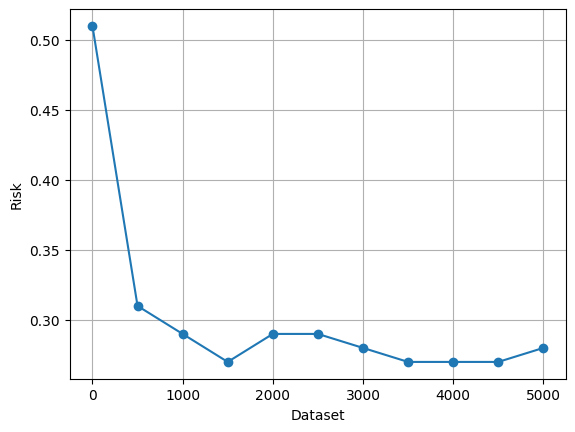

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
# f = lambda x: np.sin(x[:, 0]*x[:, 1]*20) 
def lambda_function(x):
    if x.ndim == 1:
        return np.sin(x[0] * x[1] * 20) > 0
    elif x.ndim == 2:
        return np.sin(x[:, 0] * x[:, 1] * 20) > 0

        
# Vary `m` from 0 to 5,000 in steps of 500 and plot the risk of `h` against `m`.        
m_min = 0  
m_max = 5000  
step = 500 
num_simulations = (m_max - m_max) // step + 1

# Implement a simulation in which you perform the following steps 
# multiple times for different sizes of training datasets
dataset_sizes = []
risks = []
for m in range(m_min, m_max + 1, step):
    # Randomly sample a dataset of size m
    x_train = np.random.rand(m, 2)
    y_train = lambda_function(x_train)
    
    # Using the sampled dataset, learn a classification 
    # function `h` based on the majority vote classifier.
    h = majority_vote_classifier(x_train, y_train)
    
    # Compute the risk of the function `h` using the true function `f`.
    risk = compute_risk(lambda_function, h)
    
    # append for plot
    dataset_sizes.append(m)
    risks.append(risk)

# Plot the risk against dataset
plt.plot(dataset_sizes, risks, marker='o')
# plt.colorbar()
plt.xlabel('Dataset')
plt.ylabel('Risk')
plt.grid(True)

**Question 5.1 (10 pts): Comment on the results. In particular, answer the following question:**

- Why doesn't the majority vote classifier seem to overfit, even with larger training datasets?

High bias, Low var, making it robust to Noise with few Parameters.